# Imersao de Dados 3
---

<b>Fonte de dados:</b> Alura Cursos<br>
<b>Instrutores:</b> Thiago G. Santos / Vanessa Leiko / Guilherme Silveira

## Sobre os Dados:

    Os dados se refere a experimentos realizados utilizando métodos com droga e com controle. E com ele as observacões em cada gene e célula.

### Dimensão dos Dados:
    23.814 linhas, 877 colunas

### Colunas:
* <b>Id:</b> identificacão de cada experimento, todos valores sao únicos<br><br>

* <b>Tratamento:</b> possuem 02 valores, 'com_droga' e 'com_tratamento'<br>
`Com_droga`: o experimento utiliza a droga para avaliar as variacões de genes e celulas<br>
`Com_tratamento`: o experimento recebe tratamentos sem droga para avaliar as variacões de genes e celulas<br><br>

* <b>Tempo:</b> O experimento é avaliado em 3 diferentes tempos (24h / 48h / 72h) para avaliacão.<br><br>

* <b>Dose:</b> Deducão de que `D1` = Dose menor e `D2` = Dose maior<br><br>

* <b>Droga:</b> O tipo de droga usado no experimento. Possivelmente em código ou id da droga.<br><br>

* <b>g-x:</b> G seria abreviacão para Gene. Representa a expressão de cada Gene devido as condicões apresentadas no experimento. Vai de `g-0` ate `g-771`<br><br>

* <b>c-x:</b> Cada C é um tipo de linhagem celular. Medida de viabilidade celular, ou seja, ele mostra quantas celulas que sobreviveram ao tratamento. Vai de `c-0` ate `c-99`.

# 1 - Definição do Problema de Negócio
---

<font size = '4'> Fazer uma Máquina Preditiva, capaz de prever com o tipo de tratamento e com os dados resultados de genes e celulas, prever se algum mecanismo foi ativo ou não.</font>

# 2 - Importacao de bibliotecas e Carregamento dos dados
---

In [1]:
# Importando bibliotecas utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para Pre-Processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Modelos de Machine Learning
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Biblioteca de metricas
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Carregando o arquivo .csv e transformando em um Data Frame do pandas

## Tirar o '#' para usar os dados direto da internet
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

## Dados salvos com o arquivo
#dados = pd.read_csv('dados/dados_experimentos.csv')
#dados_resultados = pd.read_csv('dados/dados_resultados.csv')

# 3.0 - Análise Exploratória dos Dados de Experimentos
---

### Análise Geral dos Dados

In [3]:
# Verificando as 5 primeiras linhas
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
# Verificando a dimensão dos dados (linhas x colunas)
dados.shape

(23814, 877)

In [5]:
# Verificando se possui algum dado missing
# Utilizei dois sum() para a soma de todas as linhas da soma de cada coluna
dados.isna().sum().sum()

0

In [6]:
# Verificando os tipos de dados de cada coluna
dados.dtypes.head(10)

id             object
tratamento     object
tempo           int64
dose           object
droga          object
g-0           float64
g-1           float64
g-2           float64
g-3           float64
g-4           float64
dtype: object

### ID

In [7]:
# verificando se todos os IDs de fato sao unicos
# e de fato sao
len(dados.id.unique())

23814

<i>**Conclusão:** Que a coluna ID é única para cada experimento

### Tratamento

In [8]:
# Verificando quais tipos de variáveis possuem na coluna
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [9]:
# Aqui vejo a quantidade que aparece de cada variável 
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

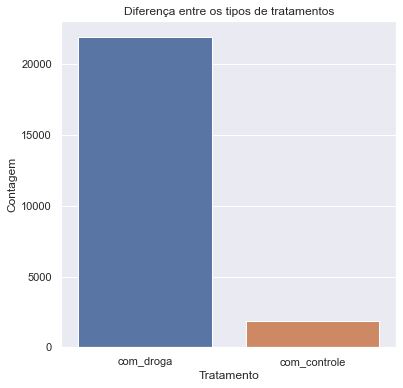

In [10]:
# com um simples gráfico em barras consigo visualizar a desproporcão entre com_droga e com_controle
sns.set()
plt.figure(figsize = (6,6))
ax = sns.countplot(x = 'tratamento', data = dados)
ax.set_title('Diferença entre os tipos de tratamentos')
plt.xlabel('Tratamento')
plt.ylabel('Contagem')
plt.show()

In [11]:
# com Normalize = True conseguimos verificar a desproporcão em porcentagem
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

<i>**Conclusão:** Que existe uma grande desproporcão entre as duas variáveis e precisamos entender o por que disso.

<font color = 'red'><h3> Questionamento 1:</h3>
#### Por que a despropocão entre as duas variáveis?</font>

### Tempo

In [12]:
# Verificando quais tipos de variáveis possuem na coluna
dados['tempo'].unique()

array([24, 72, 48], dtype=int64)

In [13]:
# Aqui vejo a quantidade que aparece de cada variavel 
dados['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

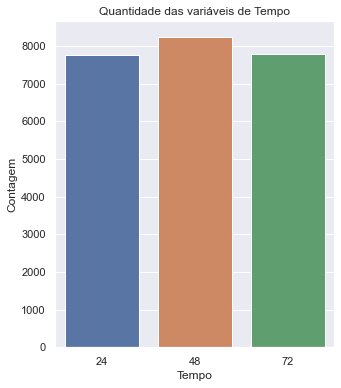

In [14]:
# visualizando a diferença entre a quantidade utilizada entre os 3 tipos de tempos
sns.set()
plt.figure(figsize = (5,6))
ax = sns.countplot(x = 'tempo', data = dados)
ax.set_title('Quantidade das variáveis de Tempo')
plt.xlabel('Tempo')
plt.ylabel('Contagem')
plt.show()

In [15]:
# verificando a diferenca em porcentagem
dados['tempo'].value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

<i>**Conclusão:** Que existe um bom balanceamento entre as 3 variáveis de tempo, porém com uma pequena diferença maior com o tempo de 48 horas. Então , mais experimentos foram feitos considerando o tempo de 48 horas.

### Dose

In [16]:
# Verificando os dados únicos da coluna
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [17]:
# Verificando a quantidade de cada variável
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

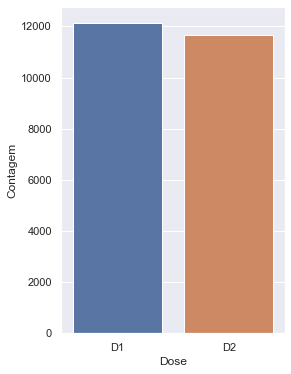

In [18]:
# Visualizando a quantidade de cada variável
plt.figure(figsize = (4,6))
sns.countplot(x = 'dose', data = dados)
ax.set_title('Quantidade das variáveis de Dose')
plt.xlabel('Dose')
plt.ylabel('Contagem')
plt.show()

In [19]:
# Verificando a diferença entre cada variável em porcentagem
dados['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

In [20]:
# Fazendo um crosstab para comparar 3 colunas ao mesmo tempo cruzando os dados
pd.crosstab([dados['tratamento'], dados['tempo']], dados['dose'], normalize = 'index')

dose                      D1        D2
tratamento   tempo                    
com_controle 24     0.496700  0.503300
             48     0.529321  0.470679
             72     0.501634  0.498366
com_droga    24     0.500279  0.499721
             48     0.527624  0.472376
             72     0.501393  0.498607

<i>**Conclusão:** Todas as 3 variáveis estão bem equilibradas

In [21]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

<i>**Conclusão:** Fazendo o cruzamento desta forma, conseguimos ver novamente que existe a diferenca entre o tipo de tratamento com_controle e com_droga

### Droga

In [22]:
# Verificando o total de tipos de drogas utilizadas no total de todos experimentos
len(dados['droga'].unique())

3289

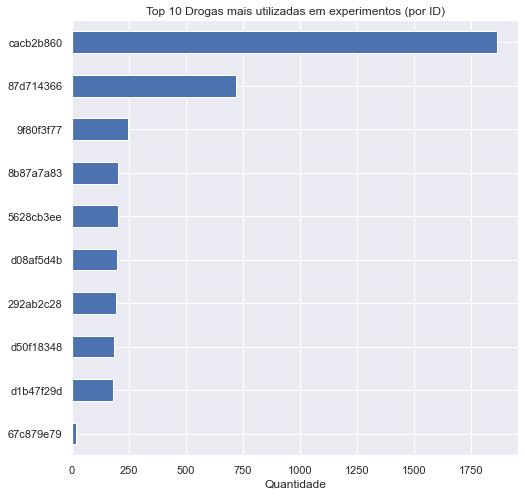

In [23]:
# Aqui conseguimos uma contagem entre as 10 principais drogas mais utilizadas nos experimentos
# Com o grafico em barras, conseguimos ver a desproporcao com todas as outras drogas
plt.figure(figsize = (8,8))
ax = dados['droga'].value_counts()[:10].sort_values(ascending = True).plot.barh()
ax.set_title('Top 10 Drogas mais utilizadas em experimentos (por ID)')
ax.set(xlabel= 'Quantidade')
plt.show()

<i>**Conclusão:** A droga `cacb2b860` é a mais utilizada em todos os experimentos.

<font color = 'red'><h3> Questionamento 2:</h3>
#### Do que se trata a droga cacb2b860?</font>

In [24]:
# Aqui pegamos todas as linhas do DataFrame que possuem a droga cacb2b860
# Desta forma conseguimos analisar a relação desta droga com cada coluna
dados_droga = dados.query("droga == 'cacb2b860'")

In [25]:
dados_droga.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,...,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,...,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364


#### cacb2b860 x tratamento

In [26]:
# Aqui conseguimos encontrar algo diferente
# que onde temos a droga em questao, ela apenas entra na parte de com_controle
dados_droga['tratamento'].value_counts()

com_controle    1866
Name: tratamento, dtype: int64

In [27]:
# Podemos ver que com o Data Frame original, que todos os `com_controle` se referem a droga cacb2b860
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [28]:
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

    <i>**Conclusão:**  Podemos ver que a droga cacb2b860, faz parte de 0.078% de todos os dados

#### cacb2b860 x tempo

In [29]:
dados_droga['tempo'].value_counts()

48    648
72    612
24    606
Name: tempo, dtype: int64

In [30]:
# Conseguimos ver que em questao de tempo, os dados permanecem com proporcoes iguais ao Data Frame original
dados_droga['tempo'].value_counts(normalize = True)

48    0.347267
72    0.327974
24    0.324759
Name: tempo, dtype: float64

#### cacb2b860 x dose

In [31]:
# Com a dose, tambem observamos que permanecem as mesmas proporcoes que o Data Frame original
dados_droga['dose'].value_counts()

D1    951
D2    915
Name: dose, dtype: int64

<font color = 'red'><h3> Resposta Questao 1:</h3>
#### Por que a despropocão entre as duas variáveis?<br>
Pois todos os experimentos com_controle se referem a droga `cacb2b860`</font>

<font color = 'red'><h3>Resposta Questao 2:</h3>
#### Do que se trata a droga cacb2b860?<br>
A droga provavelmente se trata de uma droga placebo, ou apenas uma referencia a `Não` utilização de droga no experimento.</font>

### g-x

lembrete: `g-0` ate `g-771`

In [32]:
# Aqui pego todas as colunas Gs para analise
dados_g = dados.loc[:, 'g-0':'g-771']

In [33]:
# Aqui conseguimos dar um describe para pegar uma rapida descricao estatistica
# E coloco como Transpostas para fazer os valores estatisticos virarem colunas
dados_g_t = dados_g.describe().T
dados_g_t

,count,mean,std,min,25%,50%,75%,max
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g-4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g-767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g-768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g-769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g-770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


In [34]:
# desta forma consigo puxar qual o menor valor na coluna min
dados_g_t['min'].min()

-10.0

In [35]:
# Conseguimos ver que metade dos dados chegaram ao valor minimo
dados_g_t['min'].value_counts(normalize = True).head()

-10.000    0.509067
-5.746     0.002591
-5.411     0.002591
-5.633     0.002591
-6.190     0.002591
Name: min, dtype: float64

In [36]:
# desta forma consigo puxar qual o maior valor na coluna max
dados_g_t['max'].max()

10.0

In [37]:
# desta forma conseguimos ver que quase metade dos dados possuem o maximo valor em 10.0
dados_g_t['max'].value_counts(normalize = True).head()

10.000    0.487047
5.444     0.002591
5.609     0.002591
5.834     0.002591
6.533     0.002591
Name: max, dtype: float64

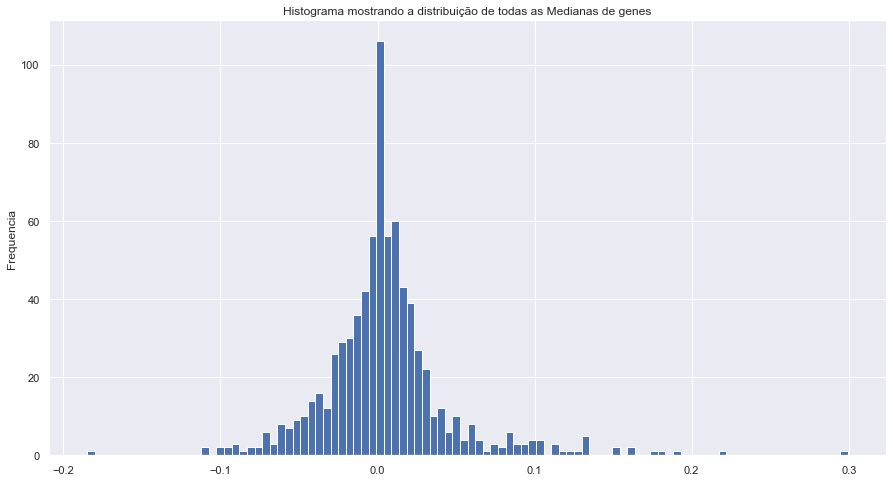

In [38]:
# Aqui usamos como media a Mediana
# Podemos ver que a maioria dos dados se situam proximo a 0.0
plt.figure(figsize = (15, 8))
ax = dados_g_t['50%'].plot.hist(bins = 100)
ax.set_title('Histograma mostrando a distribuição de todas as Medianas de genes')
ax.set(ylabel = 'Frequencia')
plt.show()

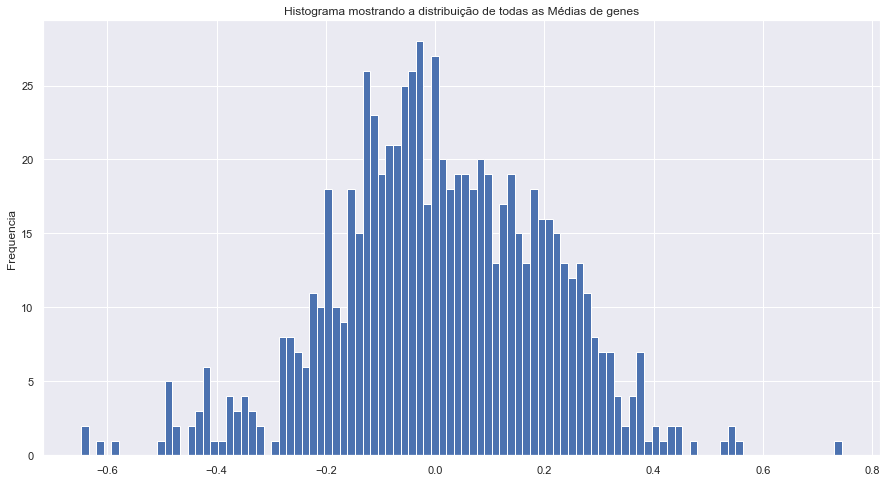

In [39]:
# Aqui verificamos a media aritmetica
# Onde podemos observar que a maioria dos dados se encontram proximo a 0.0, mas ainda sim bem distribuidos
plt.figure(figsize = (15, 8))
ax = dados_g_t['mean'].plot.hist(bins = 100)
ax.set_title('Histograma mostrando a distribuição de todas as Médias de genes')
ax.set(ylabel = 'Frequencia')
plt.show()

<font color = 'red'><h3> Questionamento 3:</h3>
#### Como os genes se comportam com os dados que possuem apenas a droga `cacb2b860`?</font>

In [40]:
dados_droga_g = dados_droga.loc[:, 'g-0':'g-771']

In [41]:
dados_droga_g_t = dados_droga_g.describe().T
dados_droga_g_t

,count,mean,std,min,25%,50%,75%,max
g-0,1866.0,-0.096364,0.833248,-4.859,-0.639000,-0.13265,0.408800,4.670
g-1,1866.0,-0.281979,0.905735,-3.341,-0.879675,-0.24255,0.320075,5.039
g-2,1866.0,-0.037559,1.016181,-9.104,-0.589150,-0.08995,0.489725,6.000
g-3,1866.0,0.090283,0.887971,-2.568,-0.434450,0.05950,0.525775,10.000
g-4,1866.0,-0.267603,1.078825,-5.805,-0.906775,-0.29720,0.416800,5.543
...,...,...,...,...,...,...,...,...
g-767,1866.0,-0.264098,0.934945,-5.667,-0.705175,-0.24285,0.294400,2.426
g-768,1866.0,-0.242252,0.702359,-3.385,-0.658975,-0.26270,0.090350,5.076
g-769,1866.0,-0.361357,1.006901,-10.000,-0.863000,-0.32895,0.258150,2.377
g-770,1866.0,0.187241,0.908228,-5.189,-0.321000,0.24015,0.723675,5.739


In [42]:
dados_droga_g_t['min'].min()

-10.0

In [43]:
dados_droga_g_t['max'].max()

10.0

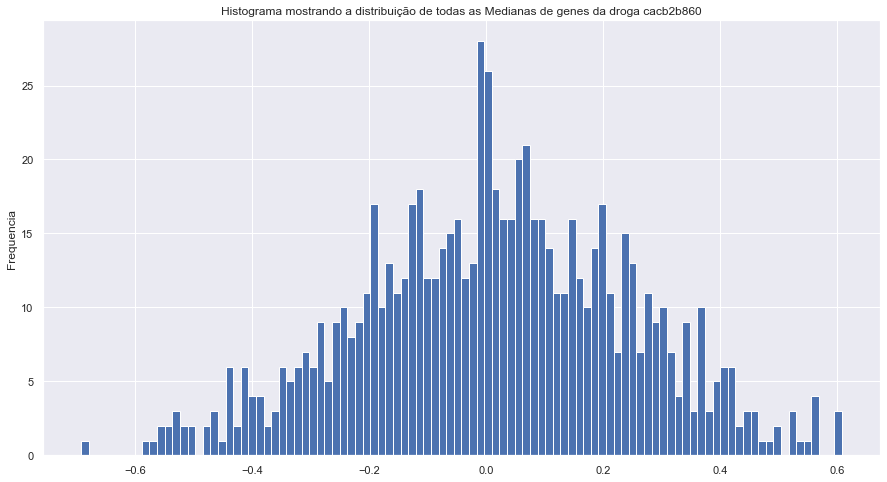

In [44]:
plt.figure(figsize = (15, 8))
ax = dados_droga_g_t['50%'].plot.hist(bins = 100)
ax.set_title('Histograma mostrando a distribuição de todas as Medianas de genes da droga cacb2b860')
ax.set(ylabel = 'Frequencia')
plt.show()

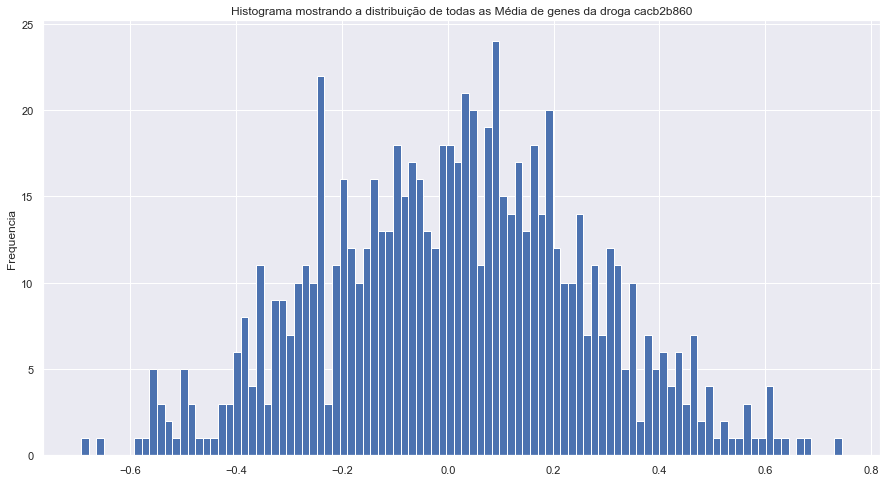

In [45]:
plt.figure(figsize = (15, 8))
ax = dados_droga_g_t['mean'].plot.hist(bins = 100)
ax.set_title('Histograma mostrando a distribuição de todas as Média de genes da droga cacb2b860')
ax.set(ylabel = 'Frequencia')
plt.show()

<font color = 'red'><h3> Reposta da questao 3:</h3>
#### Como os genes se comportam com os dados que possuem apenas a droga `cacb2b860`?
É possivel ver que as médias ficam mais dispersos comparado com todas as drogas juntas.</font>

<font color = 'red'><h3> Questionamento 4:</h3>
#### Como os genes se comportam com as outras drogas?</font>

In [46]:
dados_com_droga = dados.query("tratamento == 'com_droga'")

In [47]:
dados_com_droga_g = dados_com_droga.loc[:, 'g-0':'g-771']

In [48]:
dados_com_droga_g_t = dados_com_droga_g.describe().T

In [49]:
dados_com_droga_g_t['min'].min()

-10.0

In [50]:
dados_com_droga_g_t['max'].max()

10.0

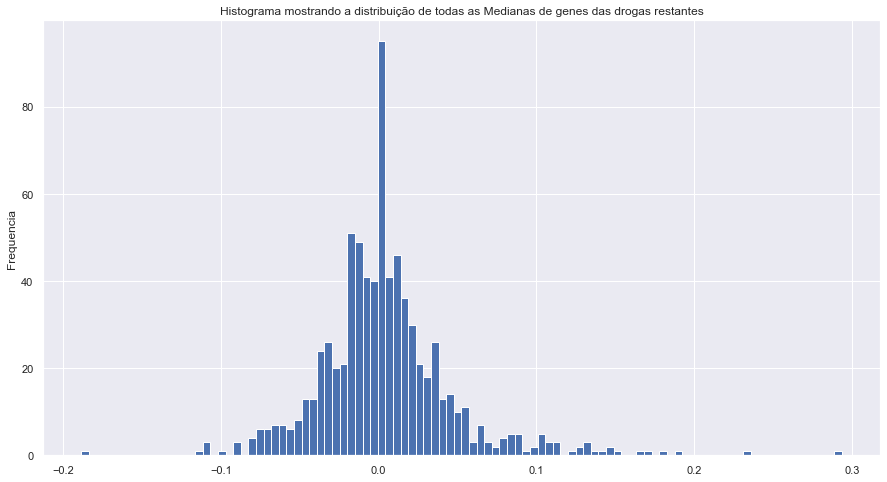

In [51]:
plt.figure(figsize = (15, 8))
ax = dados_com_droga_g_t['50%'].plot.hist(bins = 100)
ax.set_title('Histograma mostrando a distribuição de todas as Medianas de genes das drogas restantes')
ax.set(ylabel = 'Frequencia')
plt.show()

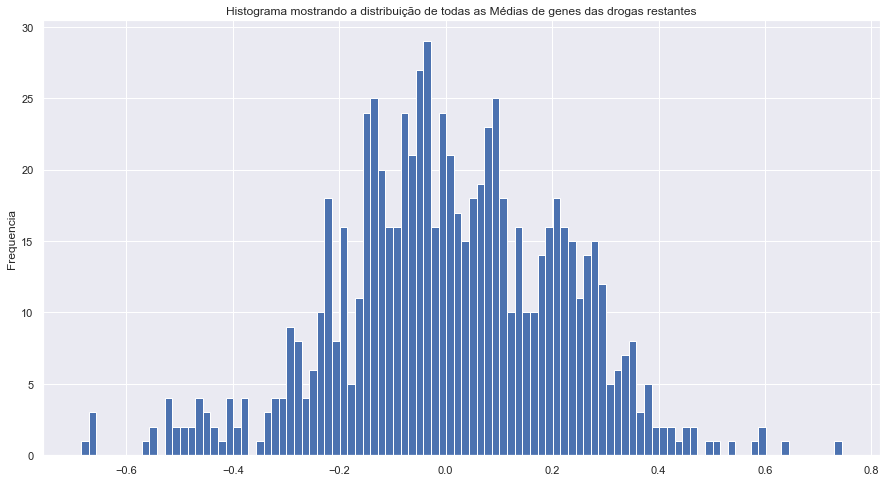

In [52]:
plt.figure(figsize = (15, 8))
ax = dados_com_droga_g_t['mean'].plot.hist(bins = 100)
ax.set_title('Histograma mostrando a distribuição de todas as Médias de genes das drogas restantes')
ax.set(ylabel = 'Frequencia')
plt.show()

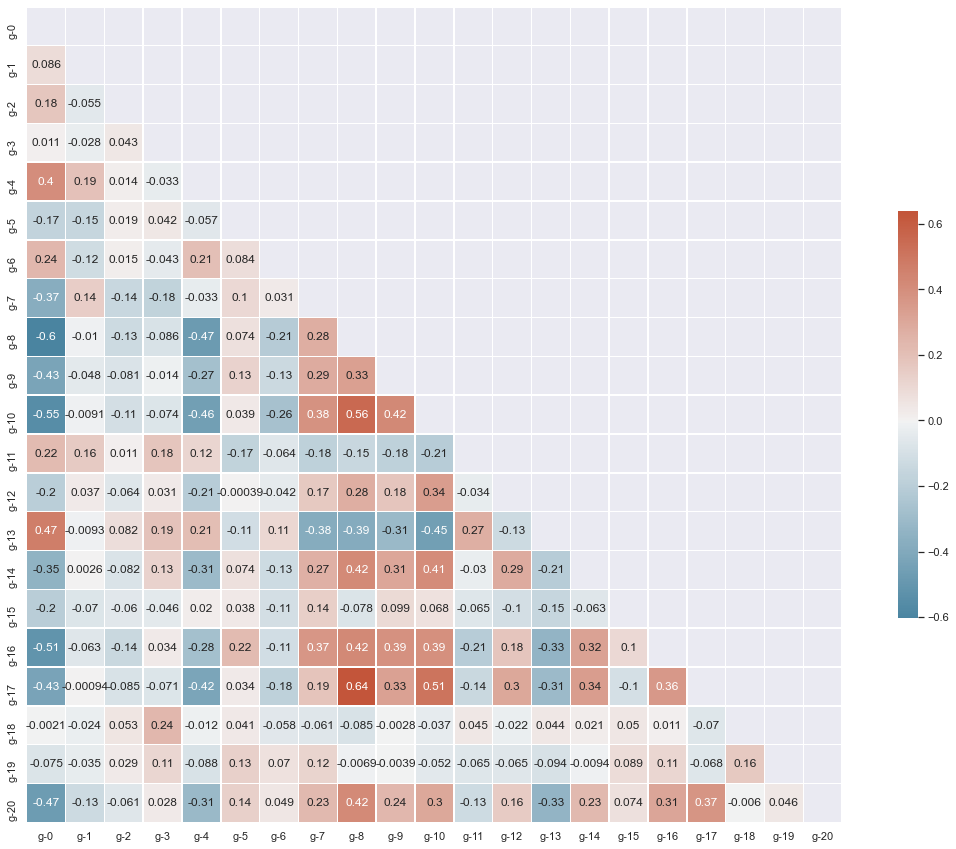

In [53]:
# Aqui podemos verificar que uma amostra dos Gs possuem uma correlação bem baixa entre eles
corr_g = dados_g.loc[:, 'g-0':'g-20'].corr()

mask = np.triu(np.ones_like(corr_g, dtype=bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_g, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

<font color = 'red'><h3> Resposta para questao 4:</h3>
#### Como os genes se comportam com as outras drogas?
Quando utilizado a droga no experimento, os genes começam a ficar com maior tendência ao 0.0</font>

### c-x

lembrete: `c-0` ate `c-99`

In [54]:
# Pegando todas as colunas Cs do Data Frame
dados_c = dados.loc[:, 'c-0':'c-99']

In [55]:
# Pegando dados estatisticos dos Cs e colocando em transposta para conseguir pegar melhores informações
dados_c_t = dados_c.describe().T

In [56]:
# verificando qual o menor valor C que possui no data frame
dados_c_t['min'].min()

-10.0

In [57]:
# verificando quantos dados possuem o menor valor C
# neste caso podemos verificar que 95% dos Cs tem o menor valor como -10.0
dados_c_t['min'].value_counts(normalize = True).head()

-10.000    0.95
-9.910     0.01
-9.938     0.01
-6.452     0.01
-9.839     0.01
Name: min, dtype: float64

In [58]:
# verificando qual o maior valor C que possui no data frame
dados_c_t['max'].max()

6.412

In [59]:
# verificando quantos dados possuem o maior valor C
# neste caso podemos verificar que todos os dados provavelmente estao bem distribuidos
# porem com uma tendencia as maximas de 3 a 4
dados_c_t['max'].value_counts(normalize = True, bins = 10)

(3.526, 3.938]                 0.24
(3.114, 3.526]                 0.22
(3.938, 4.35]                  0.21
(2.701, 3.114]                 0.13
(4.35, 4.763]                  0.07
(4.763, 5.175]                 0.06
(2.2840000000000003, 2.701]    0.03
(6.0, 6.412]                   0.02
(5.175, 5.587]                 0.01
(5.587, 6.0]                   0.01
Name: max, dtype: float64

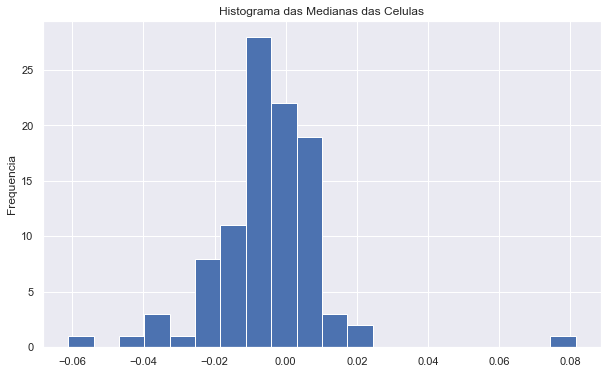

In [60]:
# Verificando a maioria das medianas dos Cs
# A maioria das medianas encontram-se no valor 0.0
plt.figure(figsize = (10, 6))
ax = dados_c_t['50%'].plot.hist(bins = 20)
ax.set_title('Histograma das Medianas das Celulas')
ax.set(ylabel = 'Frequencia')
plt.show()

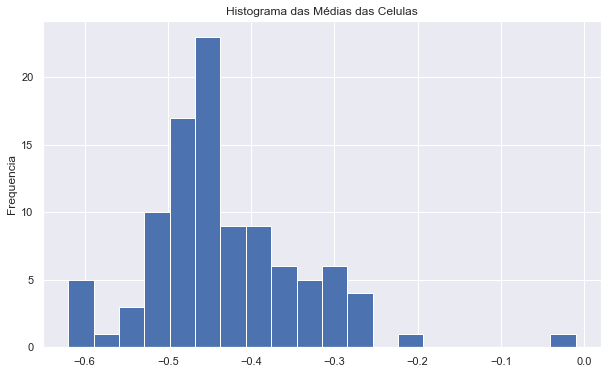

In [61]:
# Verificando a frequencia das medias nos Cs
# A maioria das medias encontram-se no valor 0.0
plt.figure(figsize = (10, 6))
ax = dados_c_t['mean'].plot.hist(bins = 20)
ax.set_title('Histograma das Médias das Celulas')
ax.set(ylabel = 'Frequencia')
plt.show()

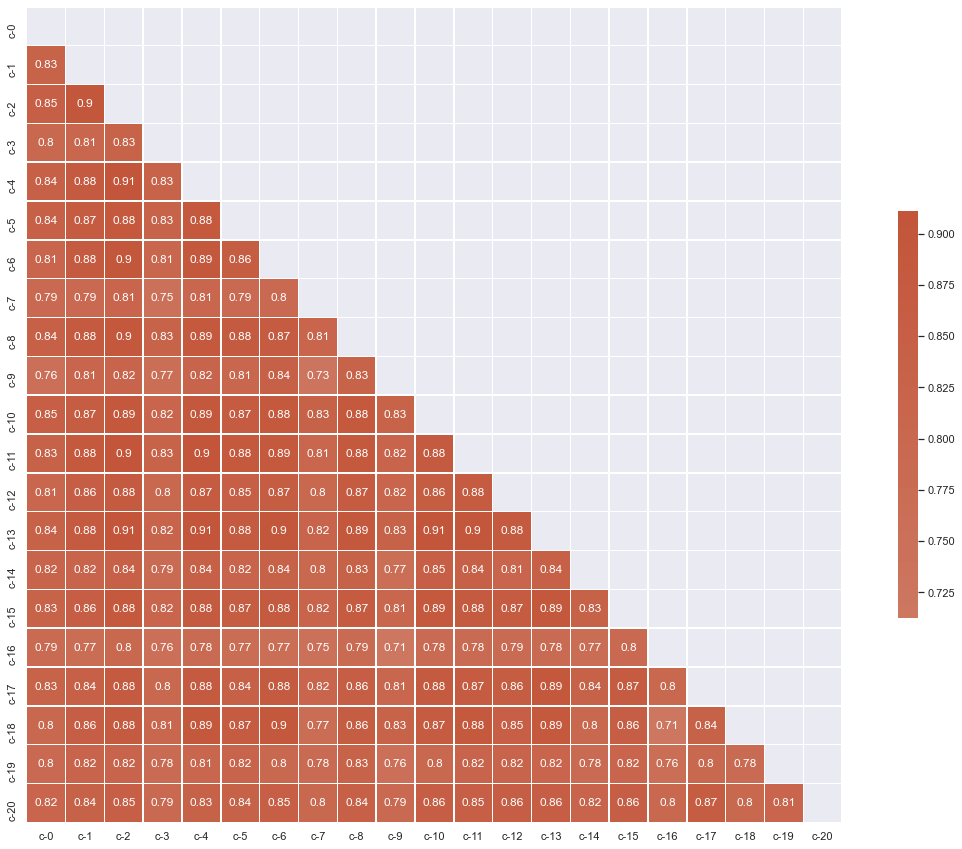

In [62]:
# Aqui podemos fazer uma correlação entre uma parte das celulas
corr_c = dados_c.loc[:, 'c-0':'c-20'].corr()

mask = np.triu(np.ones_like(corr_c, dtype=bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

<i>**Conclusão:** Aqui podemos verificar que uma parte das Celulas possuem uma correlação positiva bem alta entre eles

<font color = 'red'><h3> Questionamento 5:</h3>
#### Como sera que se correlacionam os G com os C?</font>

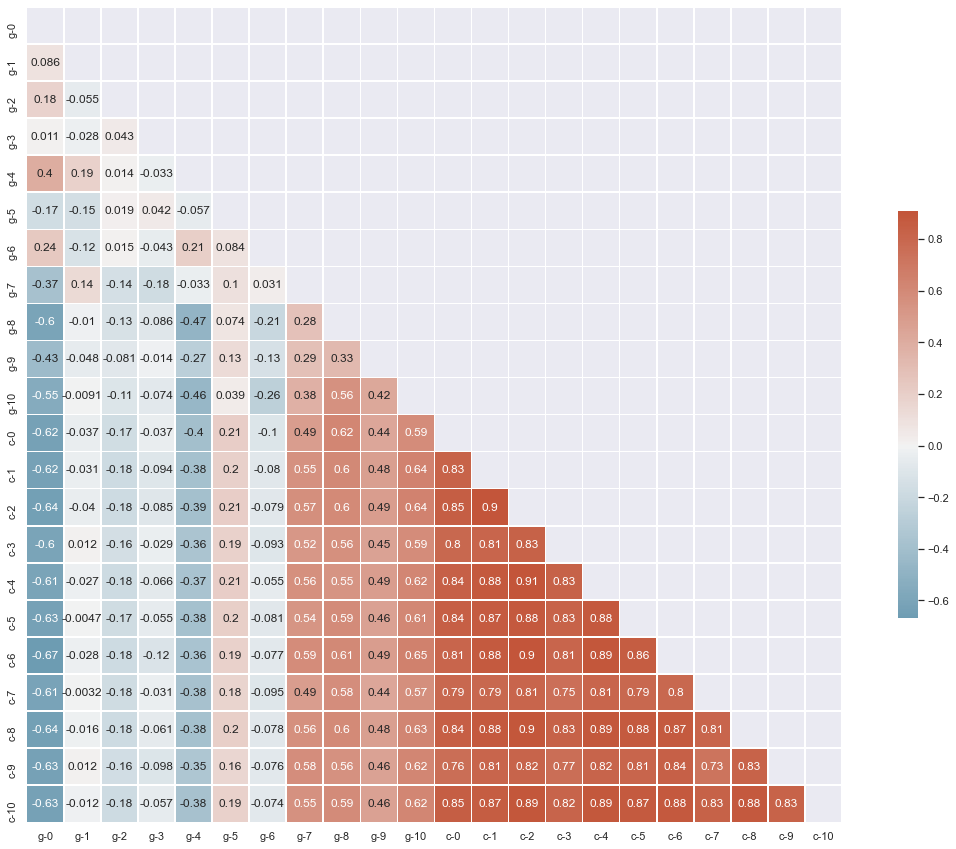

In [63]:
g = dados.loc[:, 'g-0':'g-10']
c = dados.loc[:, 'c-0':'c-10']
corr_g_c = pd.concat([g, c], axis = 1).corr()

mask = np.triu(np.ones_like(corr_g_c, dtype=bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_g_c, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

<font color = 'red'><h3>Resposta para questão 5:</h3>
#### Como sera que se correlacionam os Genes com as Celulas?
Com esta pequena amostra, podemos ver que possuem alguns que não possuem correlação e outros que possuem uma boa correlação</font>

# 3.1 - Análise Exploratória dos Dados de Resultados

Neste dados conseguimos ver os resultados dos experimentos feitos.<br>
Com ele traz mecanismos de ações onde a droga teve efeito, sendo 0 para que nao teve ação e 1 para que teve ação para algum determinado mecanismo.

In [64]:
dados_resultados

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Aqui conseguimos ver qual o mecanismo que foi mais ativado com os experimentos
mecanismos_ativados = dados_resultados.select_dtypes('int64').sum().sort_values(ascending = False)
mecanismos_ativados

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [66]:
# A última palavra de cada mecanismo representa a ação dele
# Abaixo conseguimos pegar quais as principais ações dos mecanismos
# Sao 112 ações inibidoras que foram ativadas no total de todos experimentos

df_mecanismos_ativados = mecanismos_ativados.reset_index()
df_mecanismos_ativados['index'].apply(lambda x: x.split('_')[-1]).value_counts()

inhibitor            112
antagonist            32
agonist               28
activator              5
agent                  3
blocker                2
diuretic               1
donor                  1
anticonvulsant         1
secretagogue           1
antifungal             1
antiprotozoal          1
laxative               1
scavenger              1
antifolate             1
stimulant              1
antihistamine          1
medium                 1
sensitizer             1
immunosuppressant      1
local                  1
anti-inflammatory      1
analgesic              1
antimalarial           1
antibiotic             1
antiarrhythmic         1
steroid                1
antioxidant            1
b                      1
antiviral              1
Name: index, dtype: int64

In [67]:
inhibitor10 = df_mecanismos_ativados[df_mecanismos_ativados['index'].str.contains('inhibitor')][:10]
antagonist10 = df_mecanismos_ativados[df_mecanismos_ativados['index'].str.contains('antagonist')][:10]
agonist10 = df_mecanismos_ativados[df_mecanismos_ativados['index'].str.contains('agonist')][:10]

In [68]:
inhibitor10.rename(columns = {'index':'droga', 0:'total'}, inplace = True)
antagonist10.rename(columns = {'index':'droga', 0:'total'}, inplace = True)
agonist10.rename(columns = {'index':'droga', 0:'total'}, inplace = True)

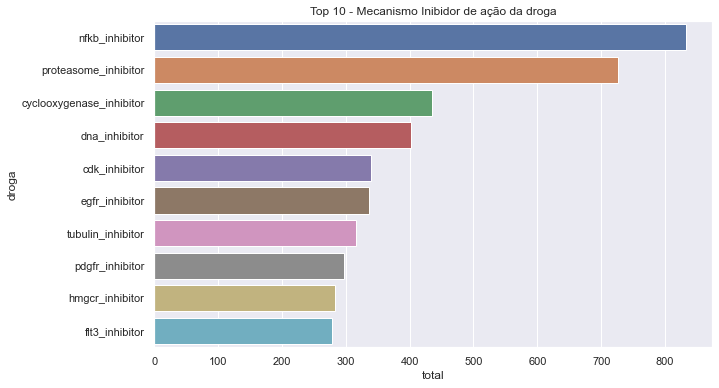

In [69]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = inhibitor10, y = 'droga', x = 'total')
ax.set_title('Top 10 - Mecanismo Inibidor de ação da droga')
plt.show()

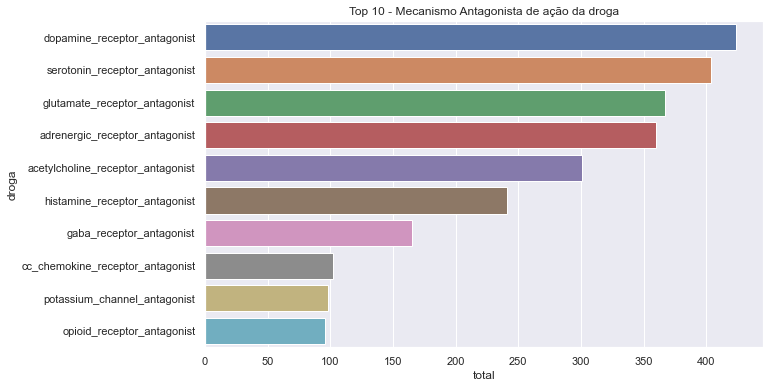

In [70]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = antagonist10, y = 'droga', x = 'total')
ax.set_title('Top 10 - Mecanismo Antagonista de ação da droga')
plt.show()

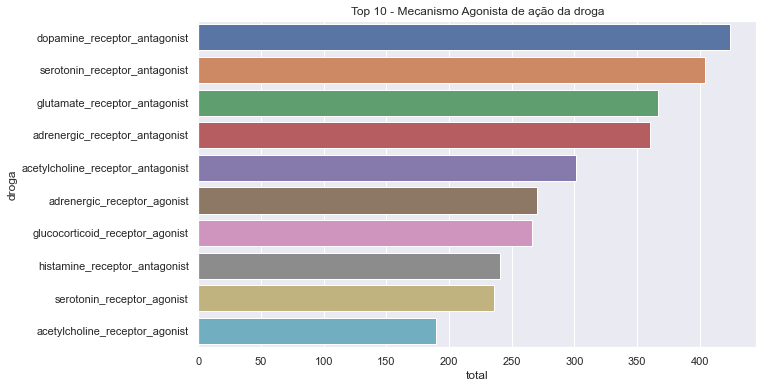

In [71]:
plt.figure(figsize = (10, 6))
ax =sns.barplot(data = agonist10, y = 'droga', x = 'total')
ax.set_title('Top 10 - Mecanismo Agonista de ação da droga')
plt.show()

In [72]:
# Aqui criaremos uma coluna mostrando a quantidade de Mecanismos foram ativos  com o experimento
# n_moa = numero de mecanismos ativados
### este comando so pode ser resultado 1x, caso contrario vai somado novamente ###
dados_resultados['n_moa'] = dados_resultados.drop('id', axis = 1).sum(axis = 1)

In [73]:
# Aqui criaremos outra coluna com resultados binarios, apenas falando se algum mecanismo foi ativo ou nao
dados_resultados['ativo_moa'] = dados_resultados['n_moa'] != 0

In [74]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [75]:
# Podemos ver que houve experimentos que ativaram 7 Mecanismos diferentes
dados_resultados['n_moa'].value_counts(ascending = True)

7        6
5       13
4       55
3      303
2     1538
0     9367
1    12532
Name: n_moa, dtype: int64

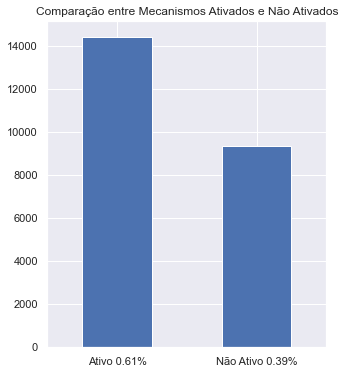

In [76]:
# Podemos ver que a quantidade de experimentos que não ativaram nenhum mecanismo esta abaixo dos que ativaram
label1 = 'Ativo ' + str(np.round(dados_resultados['ativo_moa'].value_counts(normalize = True)[1], decimals = 2)) + '%'
label2 = 'Não Ativo ' + str(np.round(dados_resultados['ativo_moa'].value_counts(normalize = True)[0], decimals = 2)) + '%'

plt.figure(figsize = (5, 6))
ax = dados_resultados['ativo_moa'].value_counts().plot.bar()
plt.xticks(rotation=0)
ax.set_xticklabels([label1, label2])
ax.set_title('Comparação entre Mecanismos Ativados e Não Ativados')
plt.show()

### União dos dados de experimentos com os resultados

In [77]:
# Fazendo um merge dos dados_resultados para os dados
# Usamos a chave 'id' para localizar e unir os 2 DataFrames nas linhas corretas
dados_combinados = pd.merge(dados, dados_resultados[['id', 'n_moa', 'ativo_moa']], on = 'id')

In [78]:
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


# 4 - Pre-processamento dos Dados
---

Neste Pre-processamento iremos processar os dados para que possam ser utilizados em Máquinas de Aprendizado. Lembrando que a máquina não consegue ler dados strings, portanto teremos que ou transformar em números ou apagar.

### ID
Por se tratar de chave primaria, podemos remover ele para processos de Aprendizado de Maquina.

In [79]:
dados_combinados.drop('id', axis = 1, inplace = True)
dados_combinados

,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,...,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,1,True
23810,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,...,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,1,True
23811,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,...,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,0,False
23812,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,...,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,1,True


### Tratamento
A coluna tratamento possui duas variaveis, com_droga e com_controle.
Como o aprendizado de maquina nao aceita variaveis strings, vou alterar ele para numeric, ou seja, 0 e 1.<br>
`com_droga` = 1<br>
`com_controle` = 0

In [80]:
# Usando o método replace() para alterar os valores para 0 ou 1 e transformando em números inteiros
dados_combinados['tratamento'] = dados_combinados['tratamento'].replace(['com_controle', 'com_droga'], ['0', '1']).astype('int64')

In [81]:
# confirmando se a coluna ficou como números inteiros
dados_combinados.tratamento.dtype

dtype('int64')

In [82]:
dados_combinados.head()

,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,1,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,1,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,1,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,1,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,1,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


### Tempo
A coluna tempo possui três variáveis, sendo 24, 48, 72.
Neste caso podemos dividir em 3 colunas para cada horário e como resultado colocar o valor 1 para seu correspondente e 0 caso nao seja.

In [83]:
dados_combinados = pd.get_dummies(dados_combinados, columns = ['tempo'])

In [84]:
dados_combinados.head()

,tratamento,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tempo_24,tempo_48,tempo_72
0,1,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,1,0,0
1,1,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,0,1
2,1,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,1,0
3,1,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,1,0
4,1,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,0,1


### Dose
A coluna dose possui duas variáveis, sendo D1 e D2.<br>
Neste caso vamos mudar apenas para valores binarios entre 0 e 1.<br>
`D1` = 0<br>
`D2` = 1

In [85]:
dados_combinados['dose'] = dados_combinados['dose'].replace(['D1', 'D2'], ['0', '1']).astype('int64')

In [86]:
dados_combinados['dose'].dtype

dtype('int64')

### Droga
A coluna droga possui 3.289 variáveis únicas.<br>
Neste caso vou apenas retirar elas do DataFrame<br>

In [87]:
dados_combinados.drop('droga', axis = 1, inplace = True)

In [88]:
dados_combinados

,tratamento,dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa,tempo_24,tempo_48,tempo_72
0,1,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,1,0,0
1,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,0,1
2,1,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,1,0
3,1,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,1,0
4,1,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,1,1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,-0.3246,0.0631,0.9171,0.5258,0.4680,1,True,1,0,0
23810,1,1,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,1,True,1,0,0
23811,0,1,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,0.6422,0.2256,0.7592,0.6656,0.3808,0,False,0,1,0
23812,1,0,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,0.7101,0.1732,0.7015,-0.6290,0.0740,1,True,1,0,0


<i>**Conclusão:** Foram retirados ou modificados todas as variaveis strings para o Aprendizado de Maquina.

In [89]:
# vamos colocar o Data Frame criado a partir da função corr() para melhor visualização dos resultados
dados_combinados_corr = dados_combinados.corr()

In [90]:
# desta forma conseguimos ver quais possuem melhores correlações positivas
dados_combinados_corr['ativo_moa'].sort_values(ascending = False).head()

ativo_moa     1.000000
n_moa         0.838153
tratamento    0.362115
g-100         0.193438
g-731         0.156487
Name: ativo_moa, dtype: float64

In [91]:
# desta forma conseguimos ver quais possuem melhores correlações negativas
dados_combinados_corr['ativo_moa'].sort_values().head()

c-6     -0.153076
c-98    -0.151677
g-185   -0.150242
g-369   -0.149051
g-385   -0.148231
Name: ativo_moa, dtype: float64

<i>**Conclusão:** Os que possuem melhores correlações são correlações positivas. O n_moa e tratamento são os que possuem maior correlação, mas praticamente estas duas variáveis já conseguem explicar nossa variável target.

#### Separando os dados para previsão e os dados previstos

In [92]:
# no x, preciso retirar valores que apontam de forma facil se e ativo ou nao
x = dados_combinados.drop(['ativo_moa', 'n_moa', 'tratamento'], axis = 1)
y = dados_combinados['ativo_moa']

#### Reducao de DImensionalidade

Por termos muitos dados, iremos fazer uma reducao utilizando o PCA sem perder informacao.<br>

In [93]:
# para fazer o PCA, o ideal e ter uma diferenca pequena entre os valores
# para isso usaremos o MinMaxScaler que ira reduzir os valores proporcionalmente entre 0 a 1
scaler = MinMaxScaler(feature_range = (0, 1))
x_scaled = scaler.fit_transform(x)

In [94]:
# apos o escalonamento dos dados conseguimos utilizar o PCA
pca = PCA(n_components = 0.95) # n_components se refere a para quantas colunas devemos reduzir
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

In [95]:
# aqui conseguimos ver os dados antes do PCA
x_scaled.shape

(23814, 876)

In [96]:
# Aqui conseguimos ver os dados com o PCA, com 200 colunas
x_pca.shape

(23814, 485)

In [97]:
# Fazemos a separacao dos dados de treino e teste com o teste sendo 30% dos dados.
x_treino, x_teste, y_treino, y_teste = train_test_split(x_pca, y, test_size = 0.3, random_state = 7)

# 5 - Aprendizado de Máquina
---

#### Criando uma base de score com DummyClassifier

In [98]:
# Este modelo usará o valor binário mais frequente e irá trazer uma predição
# Com este valor, teremos uma primeira base de quanto nossa máquina está
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
dummy_score = modelo_dummy.score(x_teste, y_teste)
print('Acuracia Modelo Dummy: {:.2f}%'.format(dummy_score * 100))

Acuracia Modelo Dummy: 60.66%


---
#### Base de previsão
Acuracia Modelo Dummy: 60.66%

---

#### RandomForestClassifier

In [99]:
modelo_rfc = RandomForestClassifier(max_depth = 3)
modelo_rfc.fit(x_treino, y_treino)
previsao_rfc = modelo_rfc.score(x_teste, y_teste)
print('Acuracia RandomForestClassifier: {:.2f}%'.format(previsao_rfc * 100))

Acuracia RandomForestClassifier: 60.66%


#### Adaboost Classifier

In [100]:
modelo_adaboost = AdaBoostClassifier()
modelo_adaboost.fit(x_treino, y_treino)
previsao_adaboost = modelo_adaboost.score(x_teste, y_teste)
print('Acuracia Modelo AdaBoostClassifier: {:.2f}%'.format(previsao_adaboost * 100))

Acuracia Modelo AdaBoostClassifier: 62.24%


#### Gradient Boosting Classifier

In [101]:
modelo_gbc = GradientBoostingClassifier()
modelo_gbc.fit(x_treino, y_treino)
previsao_gbc = modelo_gbc.score(x_teste, y_teste)
print('Acuracia Modelo GradientBoostingClassifier: {:.2f}%'.format(previsao_gbc * 100))

Acuracia Modelo GradientBoostingClassifier: 65.28%


#### LogisticRegression

In [102]:
modelo_lr = LogisticRegression()
modelo_lr.fit(x_treino, y_treino)
previsao_lr = modelo_lr.score(x_teste, y_teste)
print('Acuracia Modelo LogisticRegression: {:.2f}%'.format(previsao_lr * 100))

Acuracia Modelo LogisticRegression: 64.25%


#### DecisionTreeClassifier

In [103]:
modelo_dtc = DecisionTreeClassifier()
modelo_dtc.fit(x_treino, y_treino)
previsao_dtc = modelo_dtc.score(x_teste, y_teste)
print('Acuracia Modelo DecisionTreeClassifier: {:.2f}%'.format(previsao_dtc * 100))

Acuracia Modelo DecisionTreeClassifier: 56.11%


#### SVM

In [111]:
modelo_svm = svm.LinearSVC()
modelo_svm.fit(x_treino, y_treino)
previsao_svm = modelo_svm.score(x_teste, y_teste)
print('Acuracia Modelo DecisionTreeClassifier: {:.2f}%'.format(previsao_svm * 100))

Acuracia Modelo DecisionTreeClassifier: 64.21%


### Conclusão
Sem muitas modificações nos dados e com hiperparametros no default, a melhor acuracia foi com o Gradient Boosting Classifier, porém, com nem tanta eficácia. Logo será necessário mais modificações nos dados e possivelmente trazer mais dados que ajudem a responder.

### Conclusão Final

   Vimos que todos os experimentos são realizados com total controle de cada identificação do experimento, tempo, dosagem e como os genes e celulas se comportam com algum tipo de droga ou até mesmo com apenas um tratamento sem as drogas.<br><br>
   Também é uma forma de ver como a ciência de dados é importante para essa área, devido a ter mais controle e ser possível encontrar detalhes que apenas observando não seja fácil.<br><br>
   Possivelmente com mais tempo, mais variáveis e um maior entendimento seria possível sim fazer uma máquina preditiva que tenha uma acurácia melhor.